## Reading the data

In [1]:

import pandas as pd
import numpy as np


In [ ]:
# unzipping the downloaded file
# https://www.kaggle.com/harlfoxem/housesalesprediction

!unzip /content/archive_house.zip

In [ ]:
df= pd.read_csv('/content/kc_house_data.csv')
df

In [ ]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Data Analysis

In [ ]:
# checking how many data points and how my features do we have.
df.shape

(21613, 21)

This means there are 21 features. Out of these 21 features, 1 is target feature. Rest 20 are my input features.


There are 21613 data points in the dataset.

In [ ]:
# checking what features we have

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

From here we get to see that no columns have missing values. which is a good sign. This means no missing value imputation is needed.

Along with that, one feature is of object type. that needs to be converted into something which the machine can understands.

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
# extracting month and year from the date column

df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
a=df['date'][0]


In [ ]:
def date2month(x):
  return x.month

In [ ]:
def date2year(x):
  return x.year

In [ ]:
df['month']=df['date'].apply(date2month)
df.head(20)

In [ ]:
type(df['month'][0])

numpy.int64

In [ ]:
df['year']=df['date'].apply(date2year)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [ ]:
# now we will remove the date column.

df=df.drop(columns='date')

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [ ]:
# id is not so important feature, so i will remove it.

df=df.drop(columns='id')

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

Before sending the dataset to the machine, we need to mention which of these are input features and 54which of these are target feature.

In [ ]:
# splitting the dataset

X=df.drop(columns='price')
y=df['price']

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [ ]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

Now this dataset will be divided into training and testing datasets.

The training dataset will be used t train the model and the testing dataset will be used to evaluate and test the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

(15129, 20)

In [ ]:
y_train.shape

(15129,)

In [ ]:
X_test.shape

(6484, 20)

In [ ]:
y_test.shape

(6484,)

Now we need to scale the features so that all of them are in the same range.

In [ ]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
9677,4,2.50,2110,13939,1.0,0,0,3,8,1270,840,1978,0,98008,47.6431,-122.113,2140,8882,2,2015
19682,4,3.25,3276,10801,2.0,0,0,3,9,3276,0,2008,0,98166,47.4585,-122.361,2010,11656,2,2015
13437,4,2.75,1960,4635,1.0,0,0,4,7,1000,960,1968,0,98118,47.5693,-122.285,1830,6180,4,2015
12095,4,1.50,2020,8474,1.0,0,0,5,7,1010,1010,1962,0,98058,47.4579,-122.170,1720,8166,4,2015
13892,3,1.00,1000,6947,1.0,0,0,3,7,1000,0,1947,0,98125,47.7142,-122.319,1000,6947,9,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14477,3,1.00,890,4810,1.0,0,0,3,6,890,0,1910,0,98118,47.5153,-122.266,1230,6057,3,2015
17957,4,3.00,2480,9238,1.0,0,0,5,7,2050,430,1913,0,98166,47.4701,-122.364,1820,12214,7,2014
17459,5,4.00,4510,15175,2.0,0,0,3,10,4510,0,1969,2002,98040,47.5309,-122.228,3510,13500,5,2014
7730,4,2.50,4040,11350,2.0,0,2,4,10,3690,350,1984,0,98006,47.5590,-122.162,3770,12382,3,2015


In [ ]:
X_train

array([[ 0.66917192,  0.4909485 ,  0.02314765, ..., -0.14611507,
        -1.46824962,  1.44461796],
       [ 0.66917192,  1.45816265,  1.2836598 , ..., -0.04554305,
        -1.46824962,  1.44461796],
       [ 0.66917192,  0.81335321, -0.13901086, ..., -0.24407672,
        -0.82536854,  1.44461796],
       ...,
       [ 1.73709407,  2.42537679,  2.61768381, ...,  0.0213116 ,
        -0.503928  , -0.69222454],
       [ 0.66917192,  0.4909485 ,  2.10958714, ..., -0.01922175,
        -1.14680908,  1.44461796],
       [ 1.73709407,  5.32701923,  7.11487982, ...,  2.46930126,
        -0.18248746, -0.69222454]])

In [ ]:
from sklearn.preprocessing import StandardScaler # To standardize the data
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



## Building the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='Adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=300)

Epoch 1/300
473/473 [==============================] - 2s 2ms/step - loss: 444446058556.4894 - val_loss: 398787608576.0000
Epoch 2/300
473/473 [==============================] - 1s 2ms/step - loss: 402039506486.0084 - val_loss: 221607133184.0000
Epoch 3/300
473/473 [==============================] - 1s 2ms/step - loss: 174603409070.9873 - val_loss: 75246215168.0000
Epoch 4/300
473/473 [==============================] - 1s 2ms/step - loss: 77290288408.8439 - val_loss: 64949518336.0000
Epoch 5/300
473/473 [==============================] - 1s 2ms/step - loss: 66330481555.9831 - val_loss: 58671677440.0000
Epoch 6/300
473/473 [==============================] - 1s 2ms/step - loss: 62743692378.7342 - val_loss: 53863256064.0000
Epoch 7/300
473/473 [==============================] - 1s 2ms/step - loss: 57934108084.3882 - val_loss: 50271903744.0000
Epoch 8/300
473/473 [==============================] - 1s 2ms/step - loss: 55954355109.2658 - val_loss: 46434250752.0000
Epoch 9/300
473/473 [======

In [ ]:
dfl_adam

,loss,val_loss
0,4.334493e+11,3.987876e+11
1,3.584085e+11,2.216071e+11
2,1.313636e+11,7.524622e+10
3,7.435423e+10,6.494952e+10
4,6.615895e+10,5.867168e+10
...,...,...
295,2.199273e+10,2.506825e+10
296,2.195294e+10,2.474065e+10
297,2.193443e+10,2.494605e+10
298,2.189205e+10,2.470036e+10


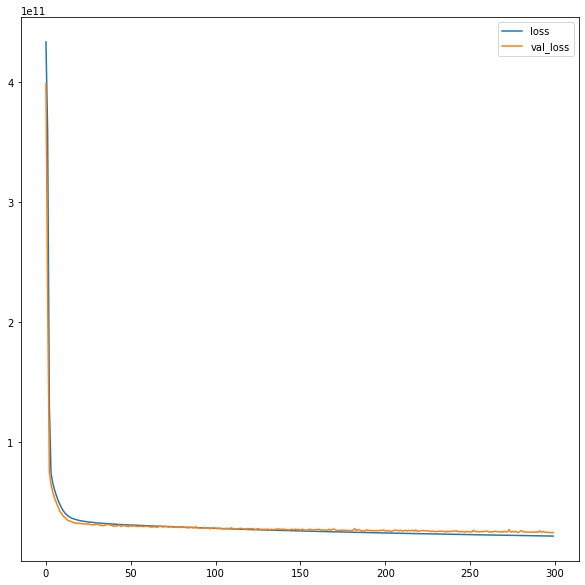

In [ ]:
dfl_adam= pd.DataFrame(model.history.history)
dfl_adam.plot(figsize=(10,10))

In [ ]:
# training with RMSprop


model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))


model.compile(optimizer='RMSprop',loss='mse')

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=300)

Epoch 1/300
473/473 [==============================] - 2s 2ms/step - loss: 423110312350.7848 - val_loss: 406588260352.0000
Epoch 2/300
473/473 [==============================] - 1s 2ms/step - loss: 434203044315.2743 - val_loss: 393465921536.0000
Epoch 3/300
473/473 [==============================] - 1s 2ms/step - loss: 423030032133.4008 - val_loss: 321149042688.0000
Epoch 4/300
473/473 [==============================] - 1s 2ms/step - loss: 305079185805.5021 - val_loss: 151741661184.0000
Epoch 5/300
473/473 [==============================] - 1s 2ms/step - loss: 132776327124.7932 - val_loss: 77221773312.0000
Epoch 6/300
473/473 [==============================] - 1s 2ms/step - loss: 75181697378.2954 - val_loss: 63640420352.0000
Epoch 7/300
473/473 [==============================] - 1s 2ms/step - loss: 65701510200.1688 - val_loss: 56280231936.0000
Epoch 8/300
473/473 [==============================] - 1s 2ms/step - loss: 60846220456.5063 - val_loss: 50782924800.0000
Epoch 9/300
473/473 [==

In [ ]:
dfl_rms

,loss,val_loss
0,4.346859e+11,4.065883e+11
1,4.299465e+11,3.934659e+11
2,3.914120e+11,3.211490e+11
3,2.605492e+11,1.517417e+11
4,1.094833e+11,7.722177e+10
...,...,...
295,2.357364e+10,2.462393e+10
296,2.357793e+10,2.459501e+10
297,2.354140e+10,2.420611e+10
298,2.357386e+10,2.493519e+10


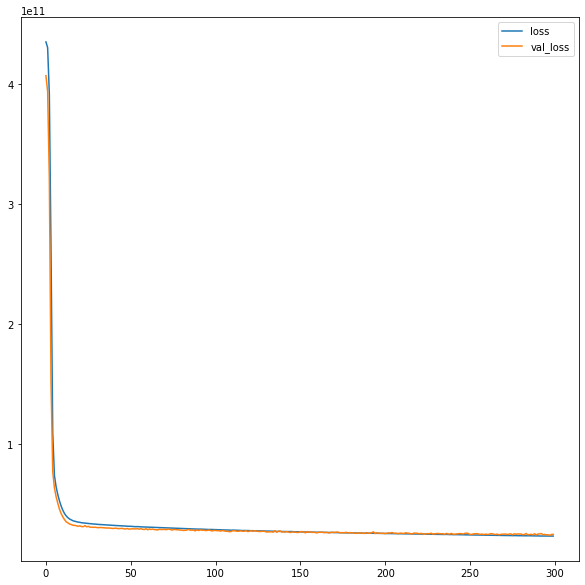

In [ ]:
dfl_rms= pd.DataFrame(model.history.history)
dfl_rms.plot(figsize=(10,10))

In [ ]:
# training with different architecture


model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))


model.compile(optimizer='Adam',loss='mse')


model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=300)

Epoch 1/300
473/473 [==============================] - 2s 2ms/step - loss: 392197321205.1983 - val_loss: 57441693696.0000
Epoch 2/300
473/473 [==============================] - 1s 2ms/step - loss: 56187035552.9451 - val_loss: 42105872384.0000
Epoch 3/300
473/473 [==============================] - 1s 2ms/step - loss: 42166481449.0464 - val_loss: 35728105472.0000
Epoch 4/300
473/473 [==============================] - 1s 2ms/step - loss: 37753110571.2067 - val_loss: 34108579840.0000
Epoch 5/300
473/473 [==============================] - 1s 2ms/step - loss: 38694391388.8945 - val_loss: 31726002176.0000
Epoch 6/300
473/473 [==============================] - 1s 2ms/step - loss: 34090338161.4177 - val_loss: 31289636864.0000
Epoch 7/300
473/473 [==============================] - 1s 2ms/step - loss: 34128868516.1857 - val_loss: 30829019136.0000
Epoch 8/300
473/473 [==============================] - 1s 2ms/step - loss: 33784381424.8776 - val_loss: 30449125376.0000
Epoch 9/300
473/473 [==========